In [1]:
print("ok")

ok


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("cleaneddata.csv")
df.head()

,NUM_LIQUIDITY_REMOVES,INACTIVITY_STATUS,DURATION,LOG_TOTAL_ADDED_LIQUIDITY,LOG_TOTAL_REMOVED_LIQUIDITY,LOG_ADD_TO_REMOVE_RATIO
0,2.0,Active,0.021829,4.886029,3.660468,1.497298
1,2.0,Active,0.021829,20.287435,20.431681,0.623623
2,1.0,Active,0.171817,15.427966,2.014898,13.556170
3,2.0,Active,0.193160,15.424950,9.459408,5.968181
4,4.0,Active,0.234896,1.292939,3.419606,0.085660


In [4]:
#Now let's split the data to features and target(X,Y)
X = df.drop('INACTIVITY_STATUS', axis=1)
y = df['INACTIVITY_STATUS']
y.head()

0    Active
1    Active
2    Active
3    Active
4    Active
Name: INACTIVITY_STATUS, dtype: object

**NOw let's do some feature transformation**
#First we will ordinal encode our traget column
#we will transform some columns in our dataset for better gradient descent

In [5]:
y= np.where(y=='Active', 1,0)

In [7]:
y

array([1, 1, 1, ..., 1, 1, 1], shape=(20872,))

In [8]:
X.columns

Index(['NUM_LIQUIDITY_REMOVES', 'DURATION', 'LOG_TOTAL_ADDED_LIQUIDITY',
       'LOG_TOTAL_REMOVED_LIQUIDITY', 'LOG_ADD_TO_REMOVE_RATIO'],
      dtype='object')

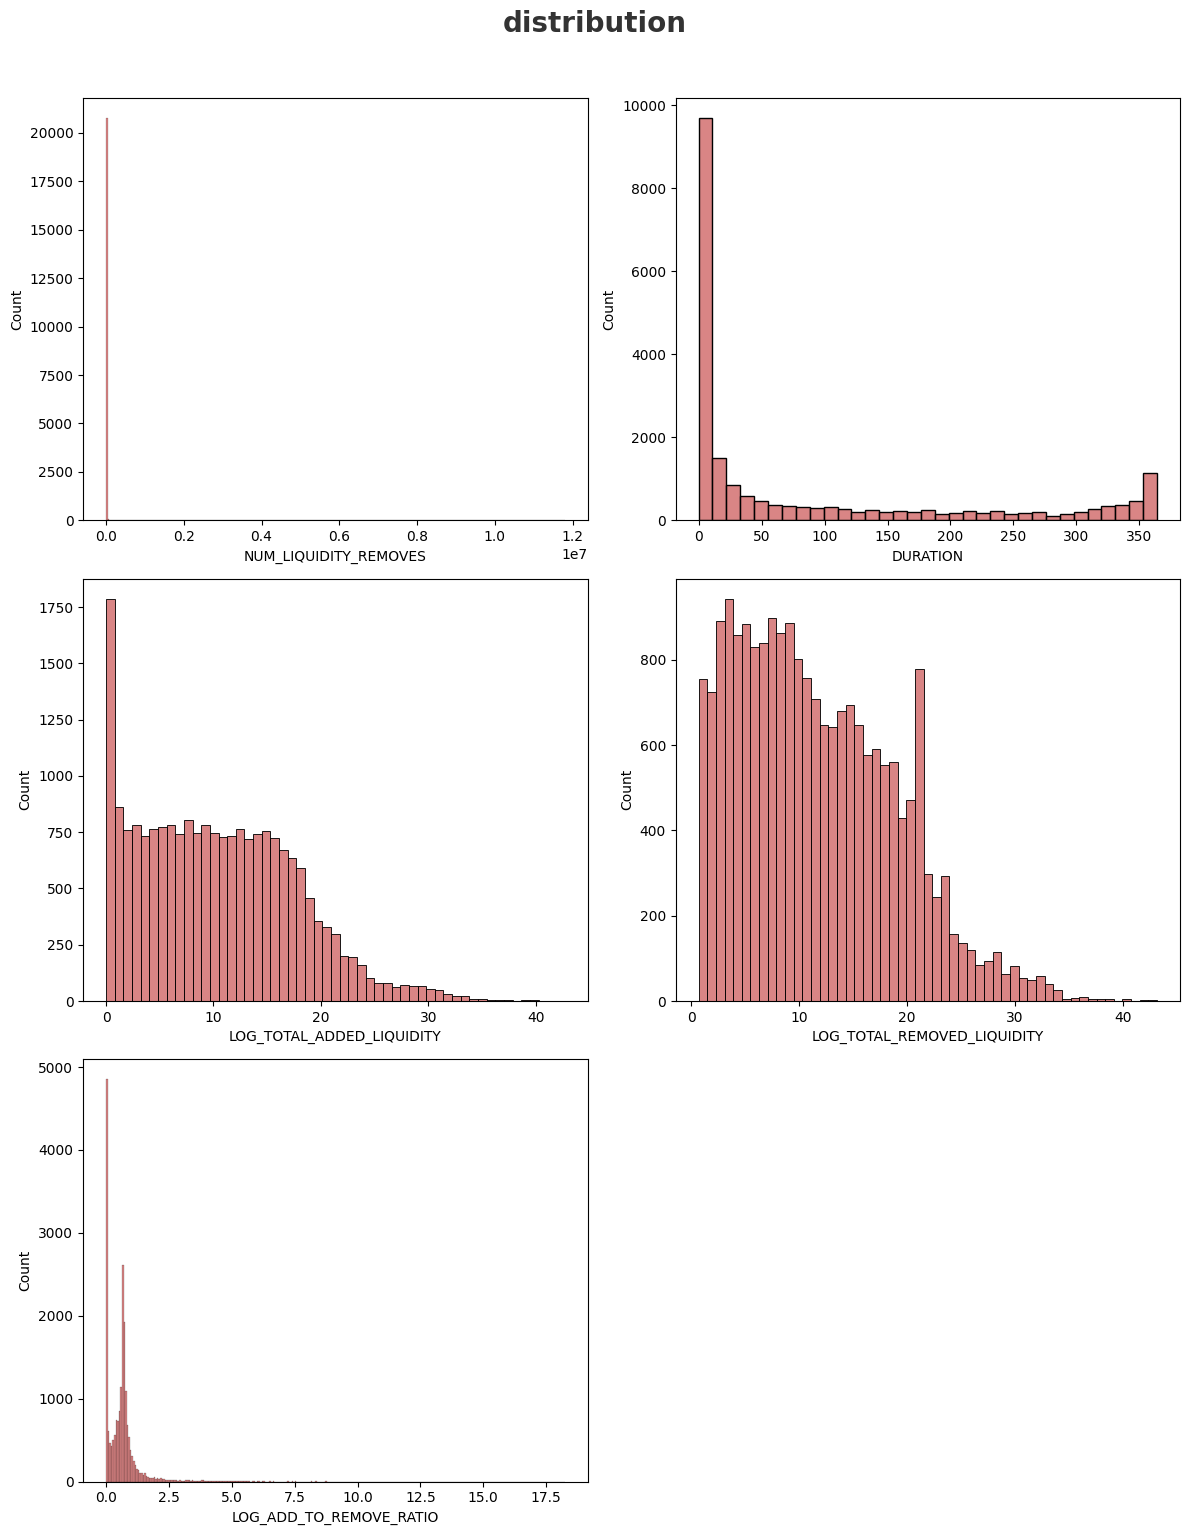

In [12]:
# distribution of data before scaling
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
n = len(list(X.columns))
rows = math.ceil(n / 2)  # 2 plots per row, adjust if you want 3 per row
plt.figure(figsize=(12, 5 * rows))
plt.suptitle('distribution', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i, col in enumerate(list(X.columns)):
    plt.subplot(rows, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

plt.tight_layout()
plt.show()
    

In [13]:
# Check Skewness
X[list(X.columns)].skew(axis=0, skipna=True)

NUM_LIQUIDITY_REMOVES          61.987818
DURATION                        1.185808
LOG_TOTAL_ADDED_LIQUIDITY       0.528809
LOG_TOTAL_REMOVED_LIQUIDITY     0.599363
LOG_ADD_TO_REMOVE_RATIO         5.395736
dtype: float64

In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['NUM_LIQUIDITY_REMOVES', 'LOG_ADD_TO_REMOVE_RATIO']
X_copy = pt.fit_transform(X[transform_features])

In [15]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

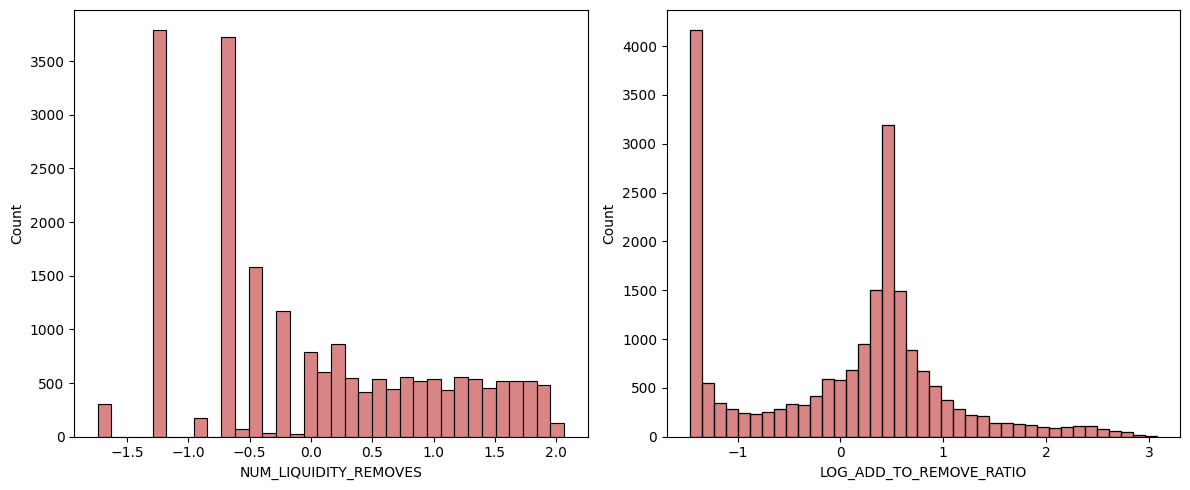

In [16]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [17]:
X_copy.skew(axis=0, skipna=True)

NUM_LIQUIDITY_REMOVES      0.338040
LOG_ADD_TO_REMOVE_RATIO    0.032974
dtype: float64

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

In [18]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [19]:
num_features

['NUM_LIQUIDITY_REMOVES',
 'DURATION',
 'LOG_TOTAL_ADDED_LIQUIDITY',
 'LOG_TOTAL_REMOVED_LIQUIDITY',
 'LOG_ADD_TO_REMOVE_RATIO']

In [20]:
# Create Column Transformer with 3 types of transformers

transform_columns= ['LOG_ADD_TO_REMOVE_RATIO','NUM_LIQUIDITY_REMOVES']

from sklearn.preprocessing import  StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()


transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [21]:
X = preprocessor.fit_transform(X)

In [22]:
X

array([[ 1.35183398e+00, -1.24122191e+00, -2.51613180e-02, ...,
        -7.58111134e-01, -1.09992851e+00,  8.66518063e-01],
       [ 3.28189149e-01, -1.24122191e+00, -2.51613180e-02, ...,
         1.37499400e+00,  1.19761612e+00, -5.50569648e-02],
       [ 2.98931183e+00, -1.73830099e+00, -2.51676957e-02, ...,
         7.01954190e-01, -1.32536057e+00,  1.35865250e+01],
       ...,
       [ 6.68966575e-01,  1.99680370e+00,  7.64877127e-01, ...,
         2.79910333e+00,  2.54901798e+00,  1.72272333e-01],
       [ 4.14100435e-01,  2.06495172e+00,  7.52020015e+01, ...,
         1.39377297e+00,  1.20196443e+00, -2.81286897e-03],
       [ 4.67726977e-01,  2.06495172e+00,  7.52020015e+01, ...,
         9.45108475e-01,  7.49259277e-01,  3.14075733e-02]],
      shape=(20872, 7))

In [ ]:
#let's do orndinal encoding of our y target:
